In [1]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

import src.utils.pre_process as pp
import src.utils.models as arch

In [2]:
path_audio = '../../dataset/test/0_pajar.wav'
# path_audio = '../../dataset/audio/6_theo_20.wav'
path_model = '../../history/mfcc/aa6672f187044594896bfaee1a62c1ec.h5'

In [3]:
ipd.Audio(path_audio)

In [54]:
def show_wave(samples, sampling_rate):
    plt.figure(figsize=(15, 3))
    librosa.display.waveplot(samples, sr=sampling_rate)
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Amplitude')
    plt.show()

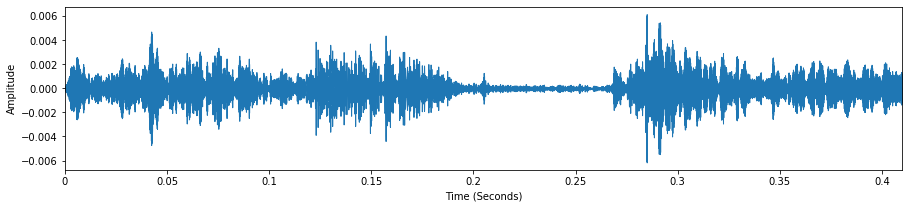

In [55]:
signal, sample_rate = librosa.load(path_audio)
emp_signal = pp.pre_emp_op(signal)
show_wave(emp_signal, sample_rate)

In [56]:
features = np.array([pp.extract_features(emp_signal, sample_rate)])

In [57]:
model = arch.mlp(features.shape[1], 10)
model.load_weights(path_model)

In [58]:
pred_class = np.argmax(model.predict(features), axis=-1)
print(f'Predict Class is {pred_class[0]}')

W1130 16:23:58.598606 13864 def_function.py:120] 8 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000002AEF487F3A8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


Predict Class is 6
